# Домашнее задание

In [ ]:
import requests
import json
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Сбор вакансий

In [ ]:
def get_page_of_vacancies(page = 0):
    params = {
        'text': 'NAME:Angular',
        'page': page,
        'per_page': 100
    }
     
    req = requests.get('https://api.hh.ru/vacancies', params)
    req.close()
    return json.loads(req.content.decode())["items"]

In [ ]:
get_page_of_vacancies()

[{'accept_temporary': False,
  'address': {'building': '3',
   'city': 'Москва',
   'description': None,
   'id': '6401988',
   'lat': 55.777282,
   'lng': 37.586024,
   'metro': None,
   'metro_stations': [],
   'raw': 'Москва, Лесная улица, 3',
   'street': 'Лесная улица'},
  'alternate_url': 'https://hh.ru/vacancy/49292862',
  'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=49292862',
  'archived': False,
  'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
  'contacts': None,
  'created_at': '2021-11-29T12:44:34+0300',
  'department': None,
  'employer': {'alternate_url': 'https://hh.ru/employer/5174849',
   'id': '5174849',
   'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/3688840.png',
    '90': 'https://hhcdn.ru/employer-logo/3688839.png',
    'original': 'https://hhcdn.ru/employer-logo-original/811988.png'},
   'name': 'Wanted',
   'trusted': True,
   'url': 'https://api.hh.ru/employers/5174849',
   'vacancies_url': 'http

In [ ]:
def get_vacancies(max_pages):
  vacancies = []
  for page in range(max_pages):
    vacancies.extend(get_page_of_vacancies(page))
  return vacancies

In [ ]:
vacancies = get_vacancies(20)
vacancies_ids = list(map(lambda x: x["id"], vacancies))
print(vacancies_ids)
print(f'Всего вакансий: {len(vacancies_ids)}')

['49292862', '50047614', '49767767', '49092623', '48716908', '49298227', '47668188', '49824794', '49824797', '49065078', '49111061', '49682616', '49824796', '50055934', '49824799', '49111062', '50045521', '50079337', '49967897', '50045636', '42714724', '49990227', '49650772', '49505087', '42992966', '50079378', '49650766', '49925323', '49585426', '49341576', '49345711', '49422694', '49344287', '49848892', '49310100', '49632483', '49633129', '49946572', '49632544', '49487451', '49633097', '49136591', '49632663', '49633018', '48378506', '40905277', '49632703', '49632572', '49633043', '49603775', '46045066', '49632768', '49632618', '49623376', '49515964', '49920439', '49950930', '50002575', '49375074', '50002577', '47642389', '50002580', '49633080', '49375077', '46778805', '50002578', '49344565', '49632727', '50002573', '46096161', '49375073', '49627483', '50044020', '48124595', '49375075', '49761130', '48283018', '44881981', '49992712', '49345196', '49375076', '46098367', '50058196', '50

In [ ]:
with open('/content/drive/MyDrive/Study/vacancies_ids.pkl', 'wb') as stream:
    pickle.dump(vacancies_ids, stream)

## Предобработка вакансий

In [ ]:
def download_full_vacancy(url):
  return requests.get(url).json()

In [ ]:
vacancy = download_full_vacancy('https://api.hh.ru/vacancies/48716908')

In [ ]:
vacancy

{'accept_handicapped': False,
 'accept_incomplete_resumes': False,
 'accept_kids': False,
 'accept_temporary': True,
 'address': None,
 'allow_messages': True,
 'alternate_url': 'https://hh.ru/vacancy/48716908',
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=48716908',
 'archived': True,
 'area': {'id': '2',
  'name': 'Санкт-Петербург',
  'url': 'https://api.hh.ru/areas/2'},
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'branded_description': None,
 'code': None,
 'contacts': None,
 'created_at': '2021-12-14T07:35:38+0300',
 'department': None,
 'description': '<p>Мы - классная команда, которая создает сервис, позволяющий людям решить сложную проблему ремонта квартиры. Наша молодая, но амбициозная компания создана профессиональными девелоперами с 25-летним опытом работы и экспертами IT- бизнеса.</p> <p><strong>Кого хотим</strong></p> <p>Не первый год в Angular? Смело откликайся! Мы создаем сервис, позволяющий людям решить сложную пробл

In [ ]:
vacancy['description']

'<p>Мы - классная команда, которая создает сервис, позволяющий людям решить сложную проблему ремонта квартиры. Наша молодая, но амбициозная компания создана профессиональными девелоперами с 25-летним опытом работы и экспертами IT- бизнеса.</p> <p><strong>Кого хотим</strong></p> <p>Не первый год в Angular? Смело откликайся! Мы создаем сервис, позволяющий людям решить сложную проблему — организовать процесс ремонт квартиры: от выбора дизайна спальни в 3D-редакторе до закупки строительных материалов, от выбора подходящей бригады мастеров до экспертной приемки работ, от точной сметы всего проекта до графика выполнения работ.</p> <p><strong>Немного о команде</strong></p> <p>— Все те, кто создают сервис, находятся в едином информационном пространстве, общаются и совместно решают задачи;</p> <p>— У нас можно ошибаться, обсуждать как можно сделать иначе, и легально заниматься рефакторингом :-)</p> <p>— Нет задач &quot;для галочки&quot; или &quot;заказчиков&quot;, мы ориентируемся только на пот

In [ ]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from concurrent.futures import ThreadPoolExecutor
import concurrent
!pip install -U spacy>=3.0
!python -m spacy download ru_core_news_md
import ru_core_news_md

     |████████████████████████████████| 43.0 MB 38.3 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 8.2 MB 20.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')


In [ ]:
nltk.download("punkt")
nlp = ru_core_news_md.load()
nltk.download("stopwords")
russian_stopwords = stopwords.words("russian")
english_stopwords = stopwords.words("english")
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nlp = ru_core_news_md.load()

def prepare_vacancy_description(description):
  #удаление мусора \b\w\b
  description = description.replace('quot', "") #удаляем кавычки
  description = re.sub("\s+", " ", re.sub("\d+", "", description)) #удаляем цифры
  description = re.sub("\s+", " ", re.sub("<[^>]*>", "", description)) #удаляем теги и все табуляции / переносы

  #токенизация и лемматизация
  tokens = [token.lemma_ for token in nlp(description)]  

  #удаление стоп-слов
  additional_punctuation = ['—', ':', '-']
  tokens = [re.sub("\W", "", token) for token in tokens if token not in russian_stopwords and token not in additional_punctuation and token not in punctuation]
  return [token for token in tokens if len(token) > 1]

<input>:6: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \d
<input>:6: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \d
<input>:6: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \d
<input>:6: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \d
<input>:6: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \d
<input>:6: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \d
<input>:6: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \d
<input>:6: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \d
<input>:6: DeprecationWarning: invalid escape sequence \s
<input>:6: Dep

In [ ]:
prepare_vacancy_description(vacancy['description'])

['классный',
 'команда',
 'которая',
 'создавать',
 'сервис',
 'позволять',
 'человек',
 'решить',
 'сложный',
 'проблема',
 'ремонт',
 'квартира',
 'наш',
 'молодой',
 'амбициозный',
 'компания',
 'создать',
 'профессиональный',
 'девелопер',
 'летним',
 'опыт',
 'работа',
 'эксперт',
 'it',
 'бизнес',
 'хотеть',
 'первый',
 'год',
 'angular',
 'смело',
 'откликаться',
 'создавать',
 'сервис',
 'позволять',
 'человек',
 'решить',
 'сложный',
 'проблема',
 'организовать',
 'процесс',
 'ремонт',
 'квартира',
 'выбор',
 'дизайн',
 'спальня',
 'редактор',
 'закупка',
 'строительный',
 'материал',
 'выбор',
 'подходить',
 'бригада',
 'мастер',
 'экспертный',
 'приёмка',
 'работа',
 'точный',
 'смета',
 'весь',
 'проект',
 'график',
 'выполнение',
 'работа',
 'немного',
 'команда',
 'весь',
 'создавать',
 'сервис',
 'находиться',
 'единый',
 'информационный',
 'пространство',
 'общаться',
 'совместно',
 'решать',
 'задача',
 'ошибаться',
 'обсуждать',
 'сделать',
 'иначе',
 'легально',
 'за

In [ ]:
def get_prepared_vacancy_from_hh(vacancy_id):
  base_url = 'https://api.hh.ru/vacancies/'
  description = download_full_vacancy((base_url + str(vacancy_id)))['description']
  return prepare_vacancy_description(description)

In [ ]:
def get_prepared_all_vacancies_from_hh(vacancy_ids):
    results = []
    with ThreadPoolExecutor() as executor:
      futures = []
      for vacancy_id in vacancy_ids:
        futures.append(executor.submit(get_prepared_vacancy_from_hh, vacancy_id = vacancy_id))
      for future in concurrent.futures.as_completed(futures):
        try:
          results.append(future.result())
        except Exception:
          pass
    return results

In [ ]:
descriptions_tokens = get_prepared_all_vacancies_from_hh(vacancies_ids)
print(f'{len(descriptions_tokens)} документов')

638 документов


In [ ]:
with open('/content/drive/MyDrive/Study/descriptions_tokens.pkl', 'wb') as stream:
    pickle.dump(descriptions_tokens, stream)

In [ ]:
descriptions_texts = list(map(lambda sub_list: ' '.join(sub_list), descriptions_tokens))
descriptions_texts[1]

'currencycom is regulated tokenised assets exchange that will be launching in the us first as crypto bank allowing traders to buy and hold major cryptocurrencies the company has offices in kiev warsaw new york london melbourne singapore cyprus and sofia and are opening in new locations all the time we are looking for an experienced and goal oriented senior front end developer to join one of our multinational product teams your main tasks will include but not limited to responsibilities perform hands on front end development write code and unit tests do proof of concepts conduct code reviews and perform testing contribute to culture of innovation ideas and continuous improvement along with great attitude solid communication skills willingness to learn and collaborate consistently meet timelines and maintain keen awareness of schedules work effectively in team environment and balance individually assigned work required work experience years of professional front end development experienc

In [ ]:
with open('/content/drive/MyDrive/Study/descriptions_texts.txt', 'w') as stream:
    for description in descriptions_texts:
      stream.write(f"|text {description}\n")

In [ ]:
descriptions_texts[:3]

['привет продуктовый ит компания помогать сделать шаг индустрия заниматься создание платформа цифровой двойник предприятие наш продукт помогать крупный игрок рынок экономить этап строительство эксплуатация объект это полноценный web приложение создать автоматизация процесс весь этап жизненный цикл предприятие проектирование эксплуатация число сложный промышленный объект наш кроссплатформенное решение позволять управлять информация состояние агрегат производство управлять процесс предприятие единый экосистема охватывать цифровизацией гектар сооружение свой запатентовать движок современный стек технология который постоянно обновляться предлагать высокий уровень заработный плата гросс официальный трудоустройство формат работа ваш выбор удалённый офисный комбинированный дмс прохождение испытательный срок agile ci cd активно участвовать внешний конференция проводить внутренний митапы сильный мотивированный команда постоянный развитие hard soft skills постоянно актуализировать стек использов

## Кластеризация вакансий

Загрузим предобработанные вакансии в виде токенов

In [ ]:
with open('/content/drive/MyDrive/Study/descriptions_tokens.pkl', 'rb') as f:
  descriptions_tokens = pickle.load(f)
  len(descriptions_tokens)

In [ ]:
descriptions_tokens[:2]

[['привет',
  'продуктовый',
  'ит',
  'компания',
  'помогать',
  'сделать',
  'шаг',
  'индустрия',
  'заниматься',
  'создание',
  'платформа',
  'цифровой',
  'двойник',
  'предприятие',
  'наш',
  'продукт',
  'помогать',
  'крупный',
  'игрок',
  'рынок',
  'экономить',
  'этап',
  'строительство',
  'эксплуатация',
  'объект',
  'это',
  'полноценный',
  'web',
  'приложение',
  'создать',
  'автоматизация',
  'процесс',
  'весь',
  'этап',
  'жизненный',
  'цикл',
  'предприятие',
  'проектирование',
  'эксплуатация',
  'число',
  'сложный',
  'промышленный',
  'объект',
  'наш',
  'кроссплатформенное',
  'решение',
  'позволять',
  'управлять',
  'информация',
  'состояние',
  'агрегат',
  'производство',
  'управлять',
  'процесс',
  'предприятие',
  'единый',
  'экосистема',
  'охватывать',
  'цифровизацией',
  'гектар',
  'сооружение',
  'свой',
  'запатентовать',
  'движок',
  'современный',
  'стек',
  'технология',
  'который',
  'постоянно',
  'обновляться',
  'предлага

Объединим токены в строки

In [ ]:
descriptions_texts = list(map(lambda tokens: ' '.join(tokens), descriptions_tokens))
descriptions_texts[:3]

['привет продуктовый ит компания помогать сделать шаг индустрия заниматься создание платформа цифровой двойник предприятие наш продукт помогать крупный игрок рынок экономить этап строительство эксплуатация объект это полноценный web приложение создать автоматизация процесс весь этап жизненный цикл предприятие проектирование эксплуатация число сложный промышленный объект наш кроссплатформенное решение позволять управлять информация состояние агрегат производство управлять процесс предприятие единый экосистема охватывать цифровизацией гектар сооружение свой запатентовать движок современный стек технология который постоянно обновляться предлагать высокий уровень заработный плата гросс официальный трудоустройство формат работа ваш выбор удалённый офисный комбинированный дмс прохождение испытательный срок agile ci cd активно участвовать внешний конференция проводить внутренний митапы сильный мотивированный команда постоянный развитие hard soft skills постоянно актуализировать стек использов

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=5)
tfidf = tfidf_vectorizer.fit_transform(descriptions_texts)
tfidf.shape

(638, 7317)

Посмотрим на словарь

In [ ]:
tfidf_vectorizer.vocabulary_.items()

dict_items([('привет', 5413), ('продуктовый', 5563), ('ит', 3788), ('компания', 3971), ('помогать', 5240), ('сделать', 6273), ('шаг', 7240), ('индустрия', 3673), ('заниматься', 3518), ('создание', 6450), ('платформа', 5107), ('цифровой', 7182), ('предприятие', 5381), ('наш', 4523), ('продукт', 5551), ('крупный', 4179), ('игрок', 3635), ('рынок', 6196), ('этап', 7272), ('строительство', 6662), ('эксплуатация', 7262), ('объект', 4732), ('это', 7275), ('web', 2391), ('приложение', 5433), ('создать', 6455), ('автоматизация', 2561), ('процесс', 5701), ('весь', 2870), ('жизненный', 3440), ('цикл', 7176), ('проектирование', 5612), ('число', 7212), ('сложный', 6370), ('промышленный', 5651), ('кроссплатформенное', 4176), ('решение', 6135), ('позволять', 5176), ('управлять', 6971), ('информация', 3734), ('состояние', 6473), ('производство', 5636), ('единый', 3411), ('экосистема', 7255), ('свой', 6250), ('современный', 6422), ('стек', 6598), ('технология', 6790), ('который', 4143), ('постоянно', 

Построим модель K-means

In [ ]:
kmeans = KMeans(n_clusters=6, max_iter=800).fit(tfidf)

In [ ]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

In [ ]:
for i in range(6):
    print(f'Тема {i}: {list(map(lambda index: terms[index], sorted_centroids[i, :6]))}') 

Тема 0: ['and', 'the', 'of', 'with', 'to', 'in']
Тема 1: ['опыт', 'разработка', 'опыт разработка', 'знание', 'работа', 'typescript angular']
Тема 2: ['работа', 'опыт', 'разработка', 'компания', 'проект', 'знание']
Тема 3: ['уверенный знание', 'уверенный', 'знание', 'развивать', 'angular material', 'наш']
Тема 4: ['задание', 'технический задание', 'система', 'опыт', 'версия git', 'git свободно']
Тема 5: ['компания', 'последний стек', 'collaboration', 'продуктовый компания', 'последний', 'продуктовый']


## Сбор корпуса документов на основе книг

In [ ]:
!pip install git+https://github.com/neuml/txtai#egg=txtai[pipeline]

  Cloning https://github.com/neuml/txtai to /tmp/pip-install-elh5ml93/txtai_b5726556d5894c79ab3b0abf2f957175
  Running command git clone -q https://github.com/neuml/txtai /tmp/pip-install-elh5ml93/txtai_b5726556d5894c79ab3b0abf2f957175
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 8.5 MB 28.2 MB/s 
     |████████████████████████████████| 300 kB 60.9 MB/s 
     |████████████████████████████████| 1.5 MB 61.4 MB/s 
     |████████████████████████████████| 97 kB 5.8 MB/s 
     |████████████████████████████████| 3.1 MB 28.0 MB/s 
     |████████████████████████████████| 12.7 MB 17.1 MB/s 
     |████████████████████████████████| 68 kB 5.8 MB/s 
     |████████████████████████████████| 4.9 MB 44.5 MB/s 
     |████████████████████████████████| 376 kB 38.6 MB/s 
  Using cached pybind11-2.8.1-py2.py3-none-any.whl (208 kB)
     |████████████████████████████████| 749 kB 43.9 MB/s 
 

In [ ]:
from txtai.pipeline import Textractor

/usr/local/lib/python3.7/dist-packages/html5lib/_trie/_base.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


FileNotFoundError: ignored

In [ ]:
def read_book(path):
  textractor = Textractor(paragraphs=True)
  return textractor(path)

In [ ]:
raw_paragraphs = []
raw_paragraphs.extend(read_book('/content/drive/MyDrive/Study/book1.pdf'))
raw_paragraphs.extend(read_book('/content/drive/MyDrive/Study/book2.pdf'))
raw_paragraphs.extend(read_book('/content/drive/MyDrive/Study/book3.pdf'))
raw_paragraphs.extend(read_book('/content/drive/MyDrive/Study/book4.pdf'))
raw_paragraphs.extend(read_book('/content/drive/MyDrive/Study/book5.pdf'))

NameError: ignored

In [ ]:
len(raw_paragraphs)

30915

In [ ]:
raw_paragraphs[:3]

['Адам Фримен Angular для профессионалов',
 'Серия «Для профессионалов»',
 'Перевел с английского Е. Матвеев']

Получили 30915 документов. Необходимо выполнить предобработку. Попробуем использовать готовый метод для предобработки вакансий

In [ ]:
prepared_paragraphs_tokens = []
for paragraph in raw_paragraphs:
  prepared_paragraphs_tokens.append(prepare_vacancy_description(paragraph))

In [ ]:
prepared_paragraphs_tokens[198:200]

[['создание',
  'конфигурация',
  'маршрутизация',
  'создание',
  'компонент',
  'маршрутизация',
  'обновление',
  'корневой',
  'модуль',
  'завершение',
  'конфигурация',
  'добавление',
  'навигационный',
  'ссылка',
  'эффект',
  'маршрутизация'],
 ['завершение',
  'реализация',
  'маршрутизация',
  'обработка',
  'изменение',
  'маршрут',
  'компонент',
  'использование',
  'параметр',
  'маршрут',
  'множественный',
  'параметр',
  'маршрут',
  'необязательный',
  'параметр',
  'маршрут',
  'навигация',
  'программный',
  'код',
  'получение',
  'событие',
  'навигация',
  'удаление',
  'привязка',
  'событие',
  'вспомогательный',
  'код']]

Объединим токены в тексты

In [ ]:
paragraphs_texts = list(map(lambda tokens: ' '.join(tokens), prepared_paragraphs_tokens))

In [ ]:
paragraphs_texts[198:200]

['создание конфигурация маршрутизация создание компонент маршрутизация обновление корневой модуль завершение конфигурация добавление навигационный ссылка эффект маршрутизация',
 'завершение реализация маршрутизация обработка изменение маршрут компонент использование параметр маршрут множественный параметр маршрут необязательный параметр маршрут навигация программный код получение событие навигация удаление привязка событие вспомогательный код']

In [ ]:
with open('/content/drive/MyDrive/Study/paragraphs_tokens.pkl', 'wb') as stream:
    pickle.dump(prepared_paragraphs_tokens, stream)

In [ ]:
with open('/content/drive/MyDrive/Study/paragraphs_texts.txt', 'w') as stream:
    for paragraph in paragraphs_texts:
      stream.write(f"|text {paragraph}\n")

## Работа с BigARTM

In [ ]:
!pip install topicnet

     |████████████████████████████████| 104 kB 27.3 MB/s 
     |████████████████████████████████| 1.9 MB 38.1 MB/s 
     |████████████████████████████████| 137 kB 44.2 MB/s 
     |████████████████████████████████| 132 kB 56.8 MB/s 
  Created wheel for topicnet: filename=topicnet-0.8.0-py3-none-any.whl size=134578 sha256=7bd59c909b50325e6a167e410669a344f2f46235ccb44b623c08b646d9ba1502
  Stored in directory: /root/.cache/pip/wheels/f9/13/72/afb22298e81a9a190b608c6f9185ee0f7b0fe0865aed9dae09
  Created wheel for strictyaml: filename=strictyaml-1.6.1-py3-none-any.whl size=123931 sha256=947a07c72d60d43c6ab1ebe31981363cfd6698525669d1ab5fa9563fb16f7e1f
  Stored in directory: /root/.cache/pip/wheels/3e/7f/3a/d36577e71e78a8e7f89a6a263c03dd39e3f876e74d1ebb051b
Successfully built topicnet strictyaml


In [ ]:
import artm

In [ ]:
batch_vectorizer = artm.BatchVectorizer(data_path='/content/drive/MyDrive/Study/paragraphs_texts.txt',
                                        data_format='vowpal_wabbit',
                                        target_folder='batches',
                                        batch_size=50)

In [ ]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches',data_format='batches')
dictionary = artm.Dictionary(data_path='batches')

In [ ]:
model = artm.ARTM(num_topics=10,
                  num_document_passes=50,
                  dictionary=dictionary,
                  scores=[artm.TopTokensScore(name='top_tokens_score')])

Обучим модель без регуляризаторов

In [ ]:
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=100)
top_tokens = model.score_tracker['top_tokens_score']

In [ ]:
def print_top_tokens(model, with_weights=False):
  if with_weights:
    for topic_name in model.topic_names:
      print(f'{topic_name}: {list(zip(top_tokens.last_tokens[topic_name], top_tokens.last_weights[topic_name]))}')
  else:
    for topic_name in model.topic_names:
      print(f'{topic_name}: {top_tokens.last_tokens[topic_name]}')

In [ ]:
print_top_tokens(model)

topic_0: ['приложение', 'angular', 'файл', 'модуль', 'реализация', 'javascript', 'typescript', 'проект', 'тестирование', 'тест']
topic_1: ['import', 'from', 'angular', 'component', 'app', 'core', 'export', 'class', 'model', 'листинг']
topic_2: ['метод', 'объект', 'значение', 'свойство', 'событие', 'привязка', 'данных', 'строка', 'возвращать', 'массив']
topic_3: ['git', 'команда', 'ветка', 'файл', 'master', 'to', 'commit', 'версия', 'папка', 'система']
topic_4: ['код', 'система', 'исходный', 'архитектура', 'программный', 'книга', 'язык', 'принцип', 'пример', 'это']
topic_5: ['компонент', 'класс', 'служба', 'тип', 'зависимость', 'функция', 'свойство', 'определение', 'angular', 'экземпляр']
topic_6: ['данных', 'рис', 'интерфейс', 'проверка', 'система', 'данные', 'пользователь', 'доступ', 'весь', 'управление']
topic_7: ['это', 'изменение', 'весь', 'мочь', 'случай', 'состояние', 'сообщение', 'следовать', 'новый', 'результат']
topic_8: ['маршрут', 'url', 'запрос', 'http', 'адрес', 'кнопка', 

Добавим первый регуляризатор

In [ ]:
model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='smooth_sparse_phi_regularizer', tau=1e-9))

Добавим второй регуляризатор

In [ ]:
model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='decorrelator_phi_regularizer', tau=1e+10))

Обучим модель с регуляризаторами

In [ ]:
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=100)
top_tokens = model.score_tracker['top_tokens_score']

In [ ]:
for topic_name in model.topic_names:
    print(f'{topic_name}: {top_tokens.last_tokens[topic_name]}')

topic_0: ['приложение', 'javascript', 'typescript', 'тестирование', 'тест', 'пакет', 'см', 'описание', 'модульный', 'загрузка']
topic_1: ['import', 'from', 'мочь', 'весь', 'использовать', 'component', 'новый', 'пример', 'app', 'core']
topic_2: ['метод', 'значение', 'событие', 'привязка', 'возвращать', 'массив', 'выражение', 'обязательство', 'вызов', 'входной']
topic_3: ['git', 'ветка', 'master', 'to', 'commit', 'head', 'origin', 'коммит', 'branch', 'log']
topic_4: ['исходный', 'архитектура', 'программный', 'добавление', 'обеспечение', 'год', 'заключение', 'компания', 'зона', 'особенность']
topic_5: ['компонент', 'класс', 'служба', 'тип', 'определение', 'экземпляр', 'декоратор', 'внедрение', 'конструктор', 'фильтр']
topic_6: ['рис', 'проверка', 'база', 'клиент', 'ввод', 'github', 'бизнес', 'протокол', 'логика', 'взаимодействие']
topic_7: ['изменение', 'сообщение', 'ситуация', 'происходить', 'либо', 'смысл', 'понять', 'данной', 'приводить', 'остаться']
topic_8: ['маршрут', 'url', 'запрос

In [ ]:
print_top_tokens(model, True)

topic_0: [('приложение', 0.17616978287696838), ('javascript', 0.05199011415243149), ('typescript', 0.04951845109462738), ('тестирование', 0.04380806162953377), ('тест', 0.04295576736330986), ('пакет', 0.032728202641010284), ('см', 0.032557740807533264), ('описание', 0.02812579832971096), ('модульный', 0.023608624935150146), ('загрузка', 0.019261911511421204)]
topic_1: [('import', 0.06106121838092804), ('from', 0.0598132498562336), ('мочь', 0.03710471838712692), ('весь', 0.03625788167119026), ('использовать', 0.02700955979526043), ('component', 0.026586143299937248), ('новый', 0.0254718866199255), ('пример', 0.021549707278609276), ('app', 0.021193144842982292), ('core', 0.02076972834765911)]
topic_2: [('метод', 0.11460623145103455), ('значение', 0.08928977698087692), ('событие', 0.0655650720000267), ('привязка', 0.05707571282982826), ('возвращать', 0.027211399748921394), ('массив', 0.025543849915266037), ('выражение', 0.025316456332802773), ('обязательство', 0.02137497067451477), ('вызо

## Работа с НС

In [ ]:
with open('/content/drive/MyDrive/Study/paragraphs_tokens.pkl', 'rb') as f:
  paragraphs_tokens = pickle.load(f)

In [ ]:
paragraphs_tokens[1]

['серия', 'профессионал']

In [ ]:
paragraphs_texts = list(map(lambda tokens: ' '.join(tokens), paragraphs_tokens))

In [ ]:
!pip install bertopic

     |████████████████████████████████| 57 kB 4.3 MB/s 
     |████████████████████████████████| 15.7 MB 39.8 MB/s 
     |████████████████████████████████| 86 kB 4.3 MB/s 
     |████████████████████████████████| 25.3 MB 56.7 MB/s 
     |████████████████████████████████| 6.4 MB 46.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 78 kB 5.4 MB/s 
     |████████████████████████████████| 3.4 MB 25.6 MB/s 
     |████████████████████████████████| 3.3 MB 29.9 MB/s 
     |████████████████████████████████| 1.2 MB 34.8 MB/s 
     |████████████████████████████████| 61 kB 420 kB/s 
     |████████████████████████████████| 636 kB 34.1 MB/s 
     |████████████████████████████████| 895 kB 36.4 MB/s 
     |████████████████████████████████| 1.1 MB 28.0 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311878 sha256=af019e737da0a6ddc2e085689

In [ ]:
paragraphs_texts[2]

'перевести английский матвеев'

In [ ]:
from bertopic import BERTopic

In [ ]:
topic_model_4 = BERTopic(language="russian", verbose=True)
topics, probabilities = topic_model_4.fit_transform(paragraphs_texts)

Batches:   0%|          | 0/967 [00:00<?, ?it/s]

2021-12-19 10:54:21,389 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2021-12-19 10:55:43,278 - BERTopic - Reduced dimensionality with UMAP
2021-12-19 10:55:49,414 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [ ]:
topic_model_4.get_topic_freq().head()

Topic  Count
0     -1   9527
1      0   1761
2      1    331
3      2    324
4      3    212

In [ ]:
for i in range(20):
  print(topic_model_4.get_topic(i))

[('normal', 0.7027057299718562), ('ние', 0.6325305239281684), ('порядок', 0.5070423300341284), ('каждый', 0.0929436324920078), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05)]
[('angular', 0.012728040659406767), ('каркас', 0.011889536225806277), ('обнаружение', 0.008167854251848464), ('погружение', 0.005162193261922819), ('предоставляться', 0.004805705356079652), ('внедрение', 0.004743399090485567), ('понентов', 0.004639459850271698), ('привязка', 0.004613693263843457), ('ряд', 0.004164096570225045), ('scope', 0.004155035977568773)]
[('рис', 0.04612589888900091), ('диаграмма', 0.01672126301684751), ('история', 0.009892659151944634), ('изобразить', 0.009447033731664074), ('коммитов', 0.00901387918755883), ('джон', 0.008659163478078857), ('круг', 0.008451560223095723), ('джессика', 0.008078333763866614), ('показать', 0.007917960911423874), ('ветка', 0.007079041875972449)]
[('обеспечение', 0.01785784710819222), ('микропрограмма', 0.017740936889100094), ('прогр

## Визуализация Облако Терминов

In [ ]:
with open('/content/drive/MyDrive/Study/paragraphs_tokens.pkl', 'rb') as f:
  paragraphs_tokens = pickle.load(f)

In [ ]:
paragraphs_tokens[2]

['перевести', 'английский', 'матвеев']

In [ ]:
paragraphs_tokens[3]

['заведующая',
 'редакция',
 'сергиенко',
 'ведущий',
 'редактор',
 'римицан',
 'художественный',
 'редактор',
 'заматевская',
 'корректоры',
 'беляев',
 'викторов',
 'вёрстка',
 'лукьянов']

In [ ]:
words_in_books = []

In [ ]:
for paragraph in paragraphs_tokens:
  for word in paragraph:
    words_in_books.append(word)

In [ ]:
len(words_in_books)

381062

In [ ]:
words_in_books[1]

'фримен'

In [ ]:
words_in_books_str = " ".join(words_in_books)

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud(width = 1000, height = 800, background_color ='white', min_font_size = 14).generate(words_in_books_str)

In [ ]:
wordcloud

In [ ]:
from matplotlib import pyplot as plt

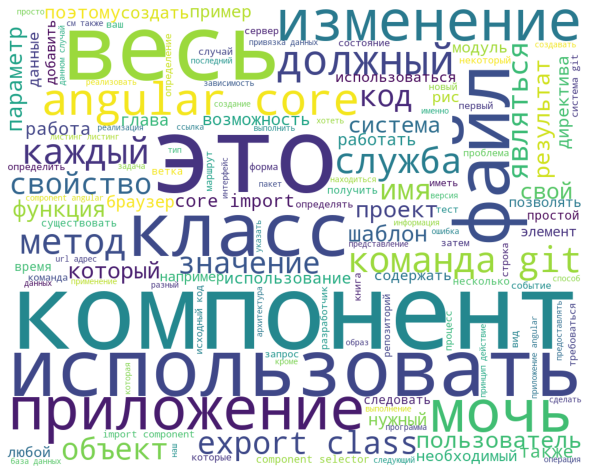

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()